<a href="https://colab.research.google.com/github/Jxiong6/Date-mining-project/blob/main/code_DMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import re
import numpy as np


# Data Reading

# Task 1A_a

In [ ]:
df = pd.read_excel("/content/drive/My Drive/DMT data/ODI-2023.xlsx")
pd.set_option('display.max_rows', None)

In [ ]:
column_names = {'What programme are you in?':'programme',
'Have you taken a course on machine learning?':'course_ML',
'Have you taken a course on information retrieval?':'course_information_retrieval',
'Have you taken a course on statistics?':'course_statistics',
'Have you taken a course on databases?':'course_databases',
'What is your gender?':'gender',
'I have used ChatGPT to help me with some of my study assignments ':'ChatGPT',
'When is your birthday (date)?':'birthday',
'How many students do you estimate there are in the room?':'students_in_the_room',
'Did you stand up to come to your previous answer ?':'stand_up',
'What is your stress level (0-100)?':'stress_level',
'How many hours per week do you do sports (in whole hours)? ':'sports_per_week',
'Give a random number':'random_number',
'Time you went to bed Yesterday':'time_to_bed',
'What makes a good day for you (1)?':'good_day_(1)',
'What makes a good day for you (2)?':'good_day_(2)'}

df.rename(columns=column_names, inplace=True)

In [ ]:
#rename the courses
courses = {'artificial intelligence': "AI",
          'ai': "AI",

          "quantitative risk management":"QRM",
          "qrm":"QRM",

          'business analytics': "BA",
           'ba': "BA",

           "computer science":"CS",
           "cs":"CS",
           "Cs":"CS",

           "finance":"Finance",

           "information sciences":"Info Sci",
           "information sci":"Info Sci",
           "info sci":"Info Sci",

           "computational science":"Comp Sci",
           "comp sci":"Comp Sci",

           "biomedical sciences":"Bio Sci",
           "biomedical sci":"Bio Sci",
           "bio sci":"Bio Sci",

           "phd":"PHD",

           "exchange":"Exch",

           "big data engineering":"Data Eng",
           "big data eng":"Data Eng",
           "big data ":"Data Eng",

           "digital business":"Digi Bus",

           "human language":"Hum Lang Tech",

           "cls":"CLS",

           "neuroscience":"Neur sci",

           "data mining":"Data Mining",
           "Data Mining":"Data Mining",


           "policy analysis":"Policy Analysis"

          }

In [ ]:
#use number to replace the words in the df
df = df.replace({"yes":1, "no":0 , "mu":1 , "sigma":0, "ja":1, "nee":0, "unknown":"NaN",
           "male":1, "female":2, "intersex":3, "nonbinary":4, "non-binary":4, "gender fluid":5, "other":6,
            "not willing to answer":7,"not willing to say":8})

In [ ]:
# Convert programme strings to lowercase
df['programme'] = df['programme'].str.lower()

# Replace programme strings with corresponding values from the courses dictionary
df['programme'] = df['programme'].apply(lambda x: courses.get(x, "NaN"))

In [ ]:
#show the data size
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 17 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Tijdstempel                                            305 non-null    datetime64[ns]
 1   programme                                              305 non-null    object        
 2   course_ML                                              305 non-null    object        
 3   course_information_retrieval                           305 non-null    object        
 4   course_statistics                                      305 non-null    object        
 5   course_databases                                       305 non-null    object        
 6   gender                                                 305 non-null    int64         
 7   ChatGPT                                                305 non-null    

In [ ]:
#revise the column:"birthday"
months = {'january': 1, 'jan': 1, 'february': 2, 'feb': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6, 'july': 7,
          'august': 8, 'september': 9, 'sept': 9, 'october': 10, 'november': 11, 'december': 12, 'th': "", 'nd': "", 'fr': "", 'bc': ''}
birthday  = df["birthday"]
for x in range(len(birthday)):
    birthday[x] = str(birthday[x]).lower()
    for i in months:
        if i in birthday[x]:
            birthday[x] = birthday[x].replace(i,str(months[i]))
    temp = ""
    for y in range(len(birthday[x])):
        if not birthday[x][y].isalpha() and not birthday[x][y].isdigit():
            temp += " "
        else:
            temp += birthday[x][y]
    birthday[x] = temp.strip()
    if len(birthday[x])<8 or len(birthday[x])>10 or birthday[x].count(" ")!=2:
        birthday[x] = "NaN"

    birthday[x]= birthday[x].split(" ")

for i in range(len(birthday)):
    if len(str(birthday[i][0]))==4:
        birthday[i][0],birthday[i][-1]=birthday[i][-1],birthday[i][0]

    if not birthday[i][-1] == "NaN":
        if int(birthday[i][-1]) < 1950:
            birthday[i] = ["NaN"]

for i in range(len(birthday)):
    birthday[i] = " ".join([str(elem) for elem in birthday[i]])

<ipython-input-9-61c7a293d098>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birthday[x] = str(birthday[x]).lower()
<ipython-input-9-61c7a293d098>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birthday[x] = temp.strip()
<ipython-input-9-61c7a293d098>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birthday[x]= birthday[x].split(" ")
<ipython-input-9-61c7a293d098>:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [ ]:
df['birthday'] = pd.to_datetime(df['birthday'], format='%d %m %Y', errors='coerce')

# Calculate the age in years
now = datetime.now()
df['age'] = (now - df['birthday']) // pd.Timedelta(days=365.25)
df.insert(9, 'age', df.pop('age'))

In [ ]:
#revise the column:"students_in_the_room"
#Removing non-numbers
df['students_in_the_room'] = pd.to_numeric(df['students_in_the_room'], errors='coerce')
df.loc[(df['students_in_the_room'].notnull()) & ((df['students_in_the_room'] <= 0) | (df['students_in_the_room'] >= 1000)), 'students_in_the_room'] = np.nan

In [ ]:
#revise the column:"stress_level"
#Remove non-numeric and out-of-range values
df['stress_level'] = df['stress_level'].apply(lambda x: int(x) if str(x).isdigit() and 0 <= int(x) <= 100 else "NaN")

In [ ]:
#revise the column:"sports_per_week"
#remove the characters and words
def convert_to_number(s):
    if "-" in s:
        indx = s.index('-')
        return str(int((int(s[:indx]) + int(s[indx+1:]))/2))
    elif "/" in s:
        indx = s.index('/')
        return str(int(s[:indx]) + int(s[indx+1:]))
    else:
        return str(int(float(s)))

numbers_pattern = r'^[0-9]{1,3}\W[0-9]{1,3}$'

for index, row in df.iterrows():
    students_num = str(row["sports_per_week"])
    if re.search(numbers_pattern, students_num):
        df.loc[index, "sports_per_week"] = convert_to_number(students_num)

In [ ]:
for index, row in df.iterrows():
    students_hours = str(row["sports_per_week"])
    temp = ''.join([char for char in students_hours if char.isdigit()])
    df.loc[index, "sports_per_week"] = temp.strip()

In [ ]:
#replace values that are out of range
for index, row in df.iterrows():
    students_hours = str(row["sports_per_week"])
    if not students_hours.isdigit() or int(students_hours) < 0 or int(students_hours) > 169:
        df["sports_per_week"][index] = "NaN"

<ipython-input-15-68cce92832a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sports_per_week"][index] = "NaN"


In [ ]:
#format the column:"time_to_bed"
for index, row in df.iterrows():
    bed_time = str(row['time_to_bed'])
    temp = ''.join([char if char.isdigit() else " " for char in bed_time])
    df.loc[index, 'time_to_bed'] = temp.strip()

for index, row in df.iterrows():
    bed_time = str(row['time_to_bed']).strip()

    if len(bed_time) ==5:
        bed_time=bed_time[:2:]+":"+bed_time[3::]
        df['time_to_bed'][index] = bed_time

    if len(bed_time) ==4:
        bed_time=bed_time[:2:]+":"+bed_time[2::]
        df['time_to_bed'][index] = bed_time

    if len(bed_time) ==2:
        temp= bed_time + ":00"
        df['time_to_bed'][index] = temp

    if len(bed_time) ==1:
        temp= "0"+ bed_time + ":00"
        df['time_to_bed'][index] = temp

    if len(bed_time) ==0:
        df['time_to_bed'][index] = "NaN"

for index, row in df.iterrows():
    df['time_to_bed'][index]=df['time_to_bed'][index].replace("12","00")
    df['time_to_bed'][index]=df['time_to_bed'][index].replace("24","00")
    df['time_to_bed'][index]=df['time_to_bed'][index].replace("11","23")

df['time_to_bed'] = df['time_to_bed'].str.replace(' ', '')
df['time_to_bed'] = pd.to_datetime(df['time_to_bed'], format='%H:%M')
df['time_to_bed'] = df['time_to_bed'].dt.time

<ipython-input-16-14f4ce04415f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_bed'][index] = bed_time
<ipython-input-16-14f4ce04415f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_bed'][index] = temp
<ipython-input-16-14f4ce04415f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_bed'][index] = bed_time
<ipython-input-16-14f4ce04415f>:24: SettingWithCopyWarning: 
A value is trying to be set 

In [ ]:
# get the second last row
second_last_row = df.iloc[-2, :]
# drop the second last row
df = df.drop(df.index[-2])
# insert the second last row as the first row
df = pd.concat([second_last_row.to_frame().T.reset_index(drop=True), df.reset_index(drop=True)], ignore_index=True)

In [ ]:
#write
df.to_csv('data_before_miss_value.csv', index=False)
df.to_excel('data_before_miss_value.xlsx', index=False)

replace missing value

In [ ]:
df = pd.read_excel("/content/drive/My Drive/DMT data/data_before_miss_value.xlsx")

In [ ]:
df.isnull().sum(axis = 0)

Tijdstempel                       0
programme                       162
course_ML                         3
course_information_retrieval     23
course_statistics                16
course_databases                  1
gender                            0
ChatGPT                           0
birthday                         83
age                              83
students_in_the_room              7
stand_up                         12
stress_level                     21
sports_per_week                   5
random_number                     0
time_to_bed                      11
good_day_(1)                      0
good_day_(2)                      1
dtype: int64

### replace missing value by linear

In [ ]:
#use linear to fill the missing value
for column_name in df.columns:
    # Check if the data type of the column is numeric
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # If the data type is numeric, interpolate and round the column
        df[column_name] = df[column_name].interpolate(method='linear').round()
    else:
        # Replace missing values with the mode of the column
        mode = df[column_name].mode().iloc[0]
        df[column_name].fillna(mode, inplace=True)


In [ ]:
df.isnull().sum(axis = 0)

Tijdstempel                     0
programme                       0
course_ML                       0
course_information_retrieval    0
course_statistics               0
course_databases                0
gender                          0
ChatGPT                         0
birthday                        0
age                             0
students_in_the_room            0
stand_up                        0
stress_level                    0
sports_per_week                 0
random_number                   0
time_to_bed                     0
good_day_(1)                    0
good_day_(2)                    0
dtype: int64

### replace missing value by pad

In [ ]:
df = pd.read_csv("/content/drive/My Drive/DMT data/data_before_miss_value.csv")

In [ ]:
#use pad to fill the missing value
df = df.fillna(method='pad')

In [ ]:
df.isnull().sum(axis = 0)

Tijdstempel                     0
programme                       0
course_ML                       0
course_information_retrieval    0
course_statistics               0
course_databases                0
gender                          0
ChatGPT                         0
birthday                        0
age                             0
students_in_the_room            0
stand_up                        0
stress_level                    0
sports_per_week                 0
random_number                   0
time_to_bed                     0
good_day_(1)                    0
good_day_(2)                    0
dtype: int64

Task 1A_b Make various plots of the data

In [ ]:
df = pd.read_csv("/content/drive/My Drive/DMT data/data_before_miss_value.csv")

Text(0.5, 23.38159722222222, 'Features')

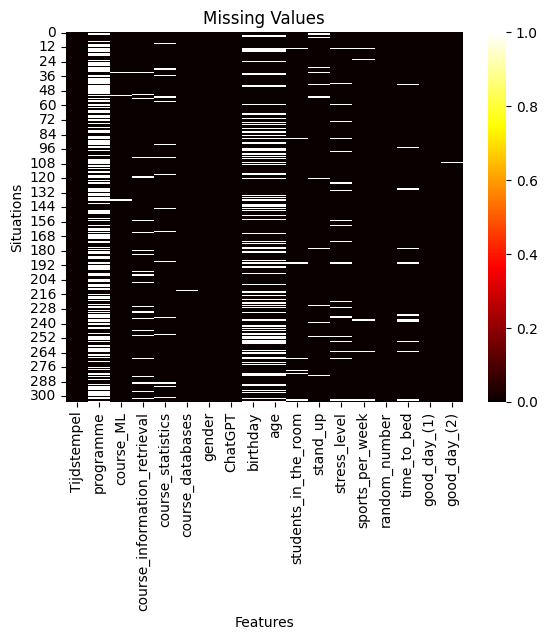

In [ ]:
plt = sns.heatmap(df.isnull(),cmap='hot')
plt.set_title('Missing Values')
plt.set_ylabel('Situations')
plt.set_xlabel('Features')


<ipython-input-28-e8cfcb4c5491>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Not ML", "ML"])
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


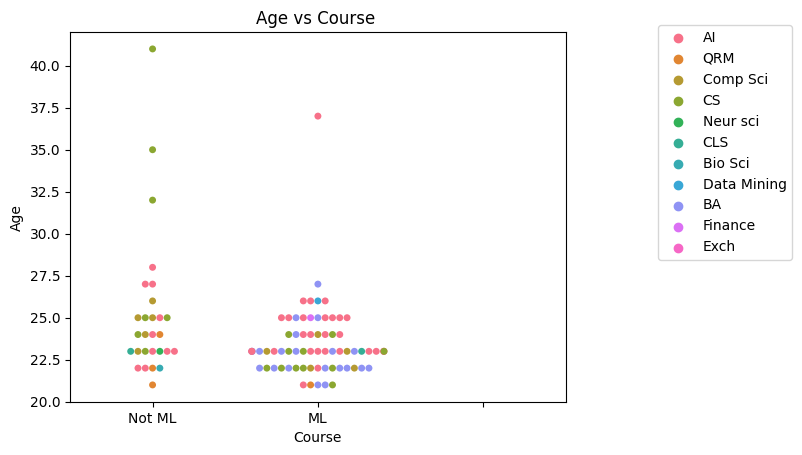

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.swarmplot(data=df, x=df['course_ML'], y=df["age"], hue=df["programme"], ax=ax)


ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=-0.5)


ax.set_xticklabels(["Not ML", "ML"])


ax.set_title("Age vs Course ")
ax.set_xlabel("Course")
ax.set_ylabel("Age")

plt.show()

<ipython-input-29-6d8fe551c339>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Not IR", "IR"])


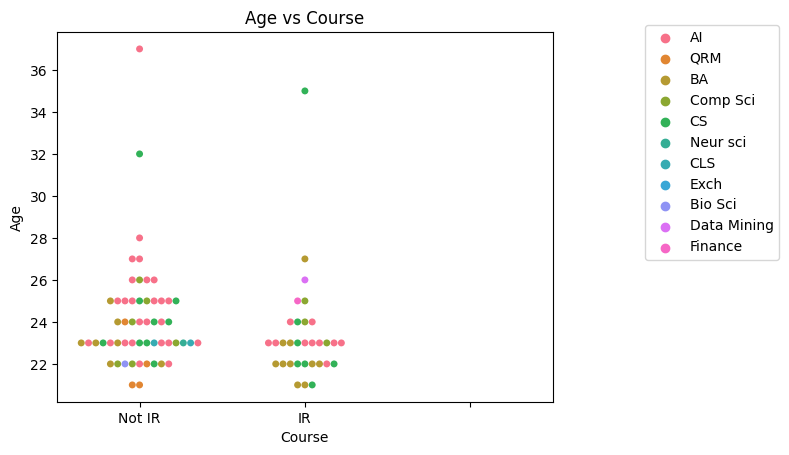

In [ ]:
fig, ax = plt.subplots()
sns.swarmplot(data=df, x=df['course_information_retrieval'], y=df["age"], hue=df["programme"], ax=ax)


ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=-0.5)


ax.set_xticklabels(["Not IR", "IR"])


ax.set_title("Age vs Course")
ax.set_xlabel("Course")
ax.set_ylabel("Age")

plt.show()


<ipython-input-30-023c11e84341>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Not Statistics", "Statistics"])
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


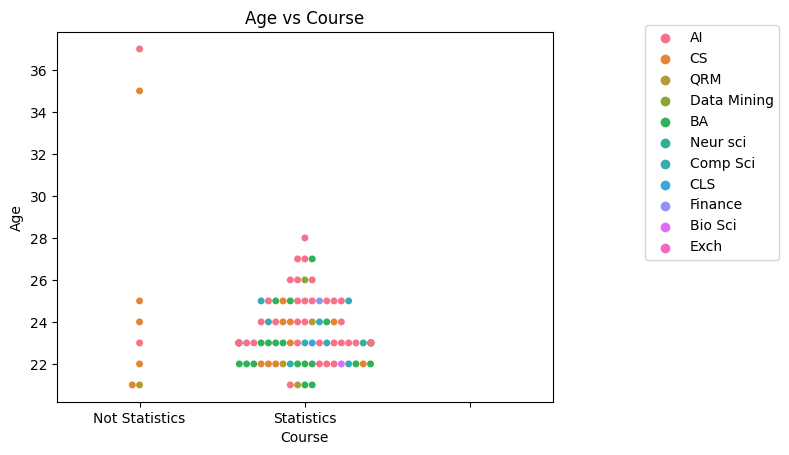

In [ ]:
fig, ax = plt.subplots()
sns.swarmplot(data=df, x=df['course_statistics'], y=df["age"], hue=df["programme"], ax=ax)


ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=-0.5)


ax.set_xticklabels(["Not Statistics", "Statistics"])


ax.set_title("Age vs Course")
ax.set_xlabel("Course")
ax.set_ylabel("Age")

plt.show()

<ipython-input-31-7ce2e322f222>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Not Databases", "Databases"])


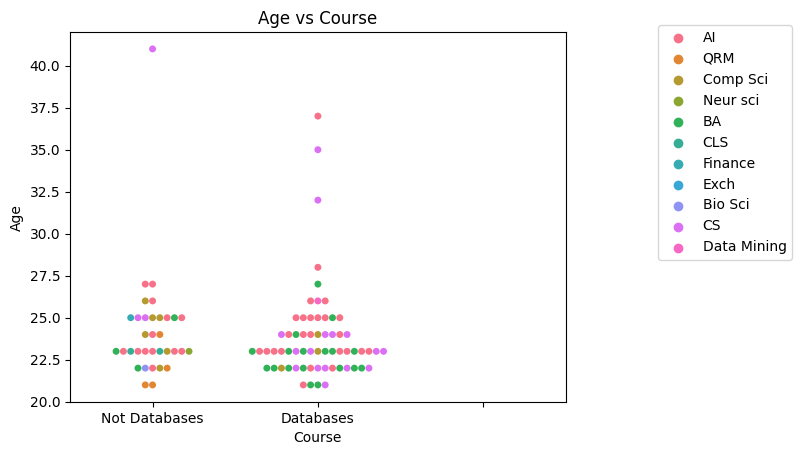

In [ ]:
fig, ax = plt.subplots()
sns.swarmplot(data=df, x=df['course_databases'], y=df["age"], hue=df["programme"], ax=ax)


ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=-0.5)


ax.set_xticklabels(["Not Databases", "Databases"])


ax.set_title("Age vs Course")
ax.set_xlabel("Course")
ax.set_ylabel("Age")

plt.show()

## Data Distribution

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Age Distribution in diff files

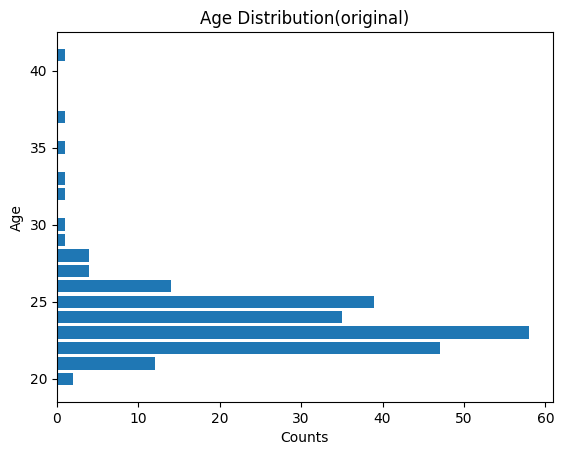

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv("/content/drive/My Drive/DMT data/data_before_miss_value.csv")

# Calculate age counts and create a horizontal bar chart
age_counts = df['age'].value_counts()
fig, ax = plt.subplots()
ax.barh(age_counts.index, age_counts.values)

# Set the plot title and axis labels
ax.set_title('Age Distribution(original)')
ax.set_xlabel('Counts')
ax.set_ylabel('Age')

# Show the plot
plt.show()

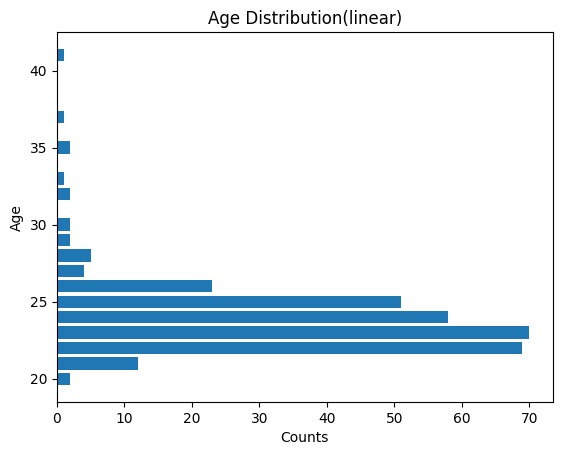

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv("/content/drive/My Drive/DMT data/data_after_fill_missing_by_linear.csv")

# Calculate age counts and create a horizontal bar chart
age_counts = df['age'].value_counts()
fig, ax = plt.subplots()
ax.barh(age_counts.index, age_counts.values)

# Set the plot title and axis labels
ax.set_title('Age Distribution(linear)')
ax.set_xlabel('Counts')
ax.set_ylabel('Age')

# Show the plot
plt.show()

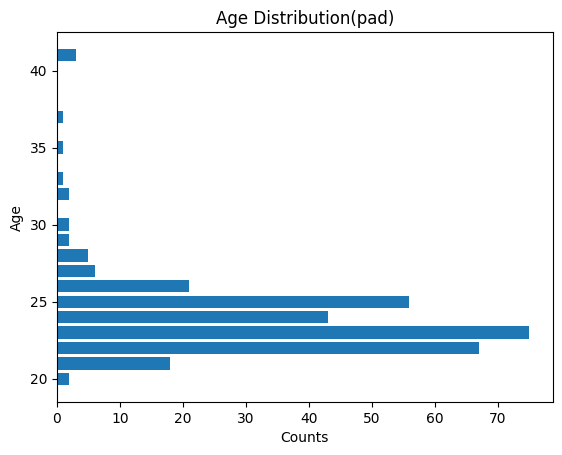

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv("/content/drive/My Drive/DMT data/data_after_fill_missing_by_pad.csv")

# Calculate age counts and create a horizontal bar chart
age_counts = df['age'].value_counts()
fig, ax = plt.subplots()
ax.barh(age_counts.index, age_counts.values)

# Set the plot title and axis labels
ax.set_title('Age Distribution(pad)')
ax.set_xlabel('Counts')
ax.set_ylabel('Age')

# Show the plot
plt.show()

<Axes: xlabel='stress_level', ylabel='Count'>

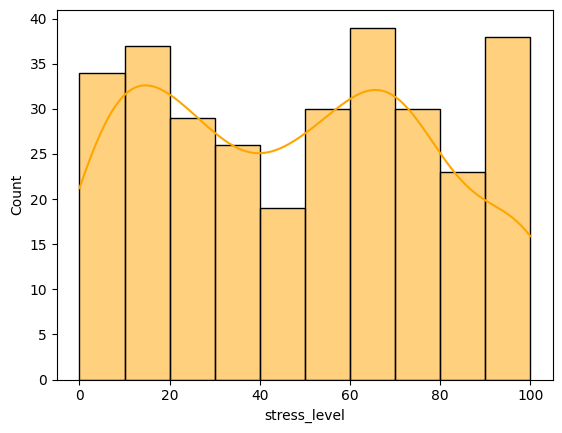

In [ ]:
sns.histplot(data=df, x="stress_level", kde=True, color='#FFA500')

# Task_2A

### Naive Bayes and Support Vector Machines(SVM) Logistic Regression.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# Load the dataset
iris = pd.read_csv("/content/drive/My Drive/DMT data/data_after_fill_missing_by_linear.csv")
iris = iris.dropna()

# Separate target variable and feature variables
target = iris['course_ML']
iris = iris.drop(['course_ML','programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','time_to_bed','stand_up'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a grid search object with cross-validation
grid = GridSearchCV(knn, param_grid, cv=5)

# Train the grid search object on the training data
grid.fit(X_train, y_train)

# Get the best KNN classifier with the best hyperparameters
best_knn = grid.best_estimator_

# Make predictions on the test data
y_pred = best_knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = best_knn.score(X_test, y_test)

print("Best hyperparameters:", grid.best_params_)
print("Accuracy:", accuracy)

Best hyperparameters: {'n_neighbors': 30}
Accuracy: 0.7377049180327869


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

F1 score: 0.8490566037735848


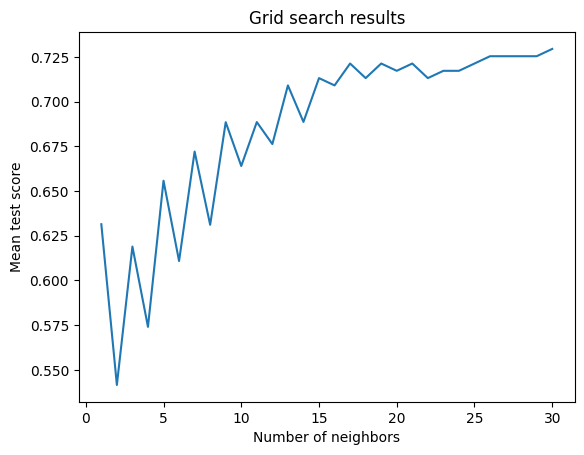

In [ ]:
import matplotlib.pyplot as plt

# Extract the mean test scores and the corresponding values of n_neighbors
results = grid.cv_results_
mean_scores = results['mean_test_score']
n_neighbors = param_grid['n_neighbors']

# Plot the mean test scores versus n_neighbors
plt.plot(n_neighbors, mean_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean test score')
plt.title('Grid search results')
plt.show()

### Naive Bayes

In [ ]:
# Load the dataset
iris = pd.read_csv("/content/drive/My Drive/DMT data/data_after_fill_missing_by_linear.csv")
iris = iris.dropna()

# Separate target variable and feature variables
target = iris['course_ML']
iris = iris.drop(['course_ML','programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','time_to_bed','stand_up'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Naive Bayes classifier object
nb = GaussianNB()

# Train the classifier on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6721311475409836


In [ ]:
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

F1 score: 0.7959183673469387


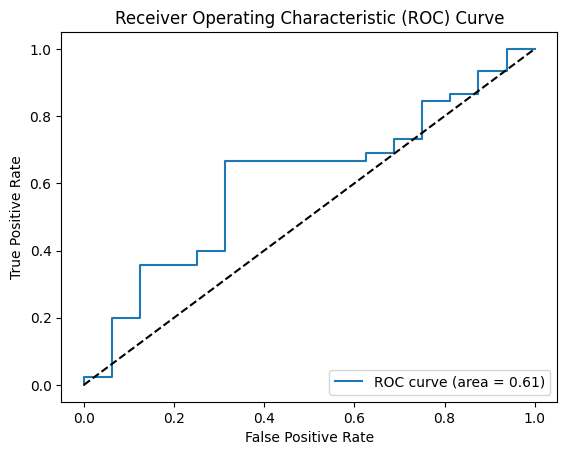

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the test data
y_pred_prob = nb.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # plot the diagonal line representing the ROC curve of a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()